In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,15)

In [ ]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df['size'].unique()

In [ ]:
df['area_type'].value_counts()

In [ ]:
df1=df.drop(['area_type','availability','society','balcony'],axis=1)
df1

In [ ]:
df1.isna().sum()

In [ ]:
df2=df1.dropna()
df2.isna().sum()

Feature Engineering

In [ ]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2

In [ ]:
df2.bhk.unique()

In [ ]:
df3=df2.drop('size',axis=1)
df3

In [ ]:
df3.bath.unique()

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

In [ ]:
def con_sqrt_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(con_sqrt_to_num)
df4=df4[df4.total_sqft.notnull()]
df4.head(5)

In [ ]:
df4[30:40]

In [ ]:
df4.loc[30]

In [ ]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

In [ ]:
df5_stats=df5.price_per_sqft.describe()
df5_stats

In [ ]:
df5.to_csv('bhp.csv',index=False)

In [ ]:
df5.location=df5['location'].apply(lambda x:x.strip())
loacation_stats=df5['location'].value_counts(ascending=False)
loacation_stats

In [ ]:
loacation_stats.values.sum()

In [ ]:
len(loacation_stats)

In [ ]:
len(loacation_stats[loacation_stats>10])

In [ ]:
len(loacation_stats[loacation_stats<=10])

In [ ]:
loc_less_than_10=loacation_stats[loacation_stats<=10]
loc_less_than_10

In [ ]:
len(df5.location.unique())

In [ ]:
df5.location=df5.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
len(df5.location.unique())

In [ ]:
df5.head(10)

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

In [ ]:
df5.shape

In [ ]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6

In [ ]:
df6.shape

In [ ]:
df6.price_per_sqft.describe()

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

In [ ]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    bhk4=df[(df.location==location) & (df.bhk==4)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',s=50,label='bhk2')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',s=50,label='bhk3')
    plt.scatter(bhk4.total_sqft,bhk4.price,color='red',s=50,label='bhk4')
    plt.xlabel('Total Square feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter(df7,'Rajaji Nagar')

In [ ]:
plot_scatter(df7,'Hebbal')

In [ ]:
plot_scatter(df7,'Whitefield')

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

In [ ]:
plot_scatter(df8,'Rajaji Nagar')

In [ ]:
plot_scatter(df8,'Whitefield')

In [ ]:
plot_scatter(df8,'Hebbal')

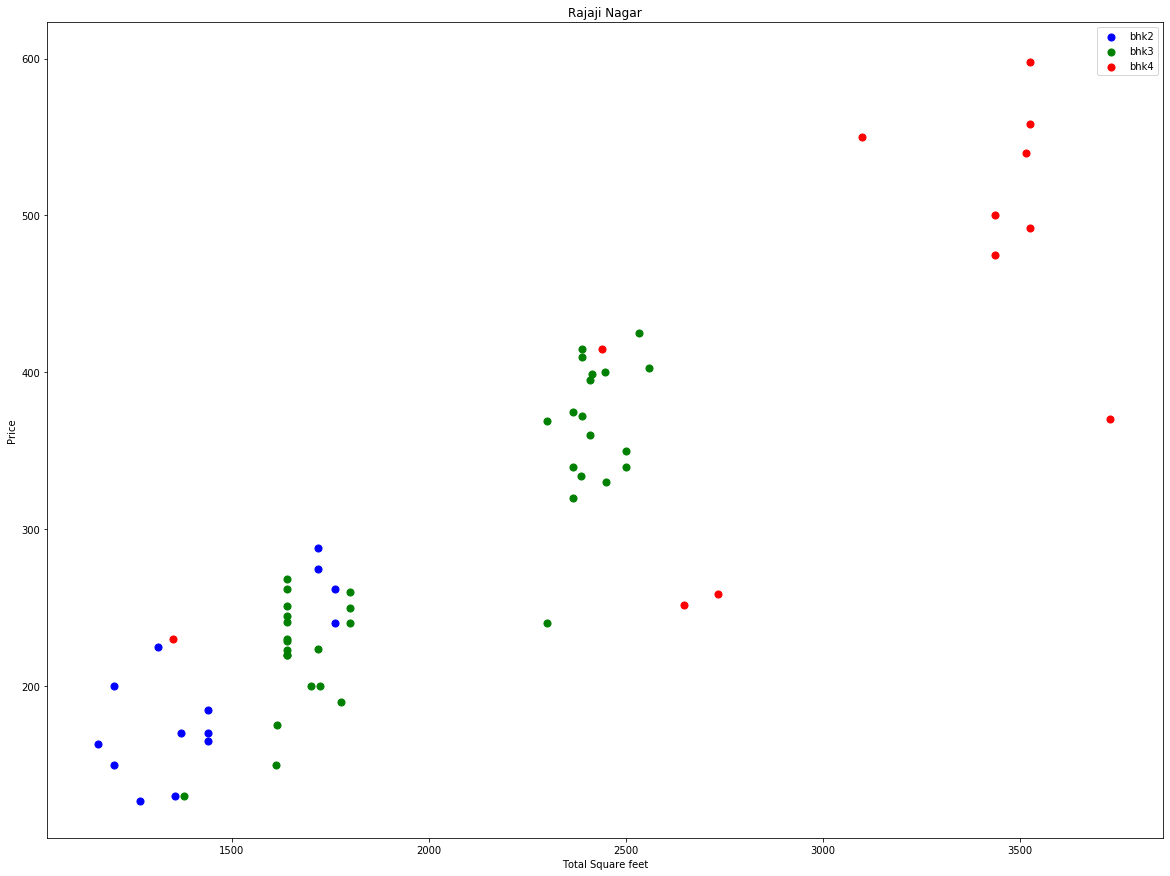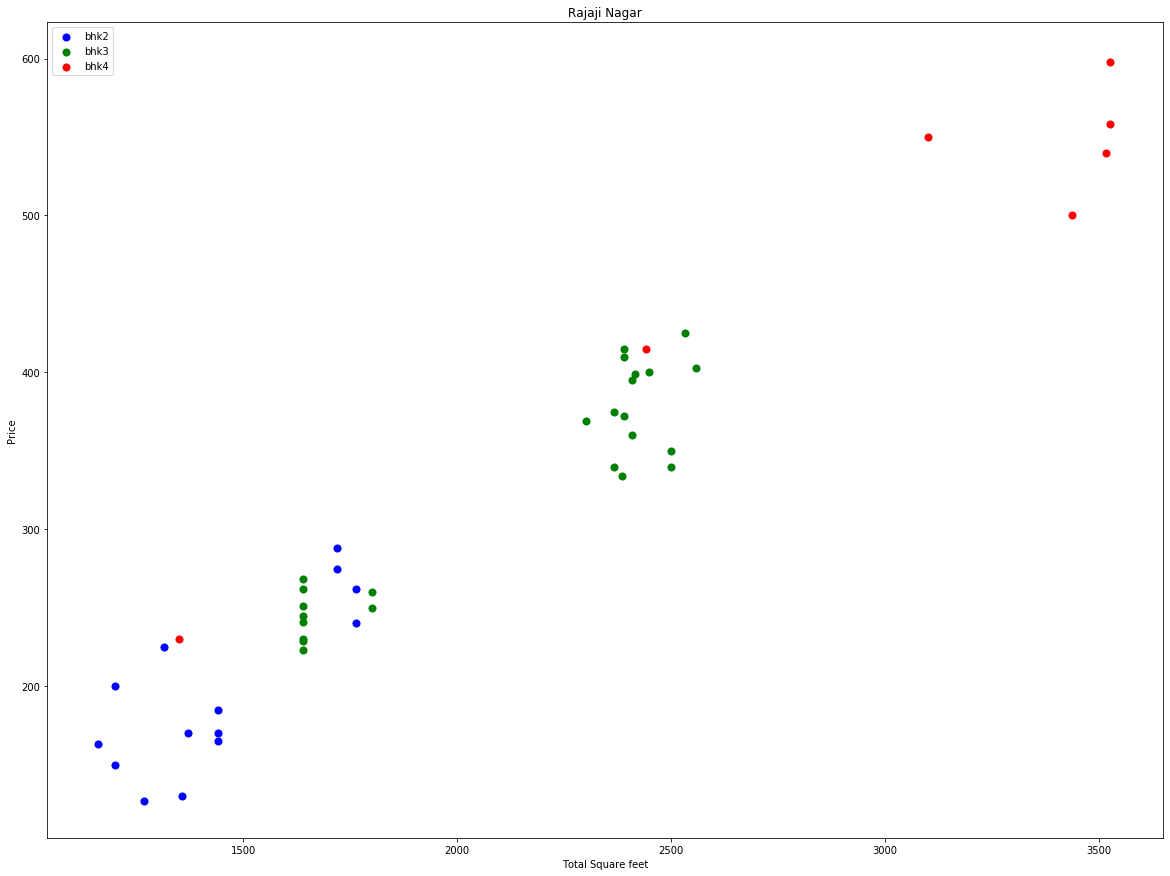

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel("count")

Outlier removing for bathroom

In [ ]:
df8.head()

In [ ]:
df8.shape

In [ ]:
df8.bath.unique()

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('No. of bathroom')
plt.ylabel('count')

In [ ]:
df8[df8.bath>10]

In [ ]:
s=df8[df8.bath>=df8.bhk+2]
s

In [ ]:
s.shape

In [ ]:
df9=df8[df8.bath<df8.bhk+2]
df9

In [ ]:
df9.shape

In [ ]:
df10=df9.drop(['price_per_sqft'],axis=1)
df10

In [ ]:
dummy=pd.get_dummies(df10.location)
dummy

In [ ]:
df11=pd.concat([df10,dummy.drop(['other'],axis=1)],axis=1)
df11

In [ ]:
df12=df11.drop(['location'],axis=1)
df12

In [ ]:
df12.shape

In [ ]:
X=df12.drop(['price'],axis=1)
X

In [ ]:
len(X)

In [ ]:
y=df12.price

In [ ]:
y

In [ ]:
len(y)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
len(y_test)

In [ ]:
len(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
l_clf=LinearRegression()

In [ ]:
l_clf.fit(X_train,y_train)

In [ ]:
l_clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
score_1=cross_val_score(l_clf,X,y,cv=cv)
np.average(score_1)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2,5],
                'max_iter': [50, 100]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index>=0:
        x[loc_index]=1
    return l_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000,3,3)

In [ ]:
predict_price('5th Phase JP Nagar',5000,4,3)

In [ ]:
predict_price('5th Phase JP Nagar',5000,5,5)

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(l_clf,f)

In [ ]:
import json
columns={
    'data-columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

To predict the price by using pickle file of my model:

In [ ]:
with open('home_prices_model.pickle','rb') as f:
    mp=pickle.load(f)